In [82]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataPath = "custom_15/"

vocabulary = pd.read_csv(dataPath + "vocabulary.txt", header=None).to_numpy().flatten()

neutral_topic_mean = np.load(dataPath +"neutral_topic_mean.npy")
negative_topic_mean = np.load(dataPath +"negative_topic_mean.npy")
positive_topic_mean = np.load(dataPath +"positive_topic_mean.npy")
authors = pd.read_csv(dataPath +"authors.csv")
authors["name"]


os.path.join(os.path.dirname('.'), os.pardir)
decoder = pd.read_csv(os.path.join(os.path.join(os.path.dirname('.'), os.pardir), "data\\paradigms\\clean\\english\\id_name_para.csv"), index_col=0)['Judge Name']
print("n_topics:", neutral_topic_mean.shape[0])
print("n_judges:", authors.shape[0])


n_topics: 15
n_judges: 1262


In [83]:
vocabulary

array(['00', '000', '001', ..., 'εá½', 'νοια', 'めんどくさい'], dtype=object)

In [84]:
# @title Run this cell to create helper function for printing topics


def get_topics(
    neutral_mean, negative_mean, positive_mean, vocabulary, print_to_terminal=True
):
    num_topics, num_words = neutral_mean.shape
    words_per_topic = 10
    top_neutral_words = np.argsort(-neutral_mean, axis=1)
    top_negative_words = np.argsort(-negative_mean, axis=1)
    top_positive_words = np.argsort(-positive_mean, axis=1)
    topic_strings = []
    for topic_idx in range(num_topics):
        neutral_start_string = "Neutral  {}:".format(topic_idx)
        neutral_row = [
            vocabulary[word] for word in top_neutral_words[topic_idx, :words_per_topic]
        ]
        neutral_row_string = ", ".join(neutral_row)
        neutral_string = " ".join([neutral_start_string, neutral_row_string])

        positive_start_string = "Positive {}:".format(topic_idx)
        positive_row = [
            vocabulary[word] for word in top_positive_words[topic_idx, :words_per_topic]
        ]
        positive_row_string = ", ".join(positive_row)
        positive_string = " ".join([positive_start_string, positive_row_string])

        negative_start_string = "Negative {}:".format(topic_idx)
        negative_row = [
            vocabulary[word] for word in top_negative_words[topic_idx, :words_per_topic]
        ]
        negative_row_string = ", ".join(negative_row)
        negative_string = " ".join([negative_start_string, negative_row_string])

        if print_to_terminal:
            topic_strings.append(negative_string)
            topic_strings.append(neutral_string)
            topic_strings.append(positive_string)
            topic_strings.append("==========")
        else:
            topic_strings.append(
                "  \n".join([negative_string, neutral_string, positive_string])
            )

    if print_to_terminal:
        all_topics = "{}\n".format(np.array(topic_strings))
    else:
        all_topics = np.array(topic_strings)
    return all_topics

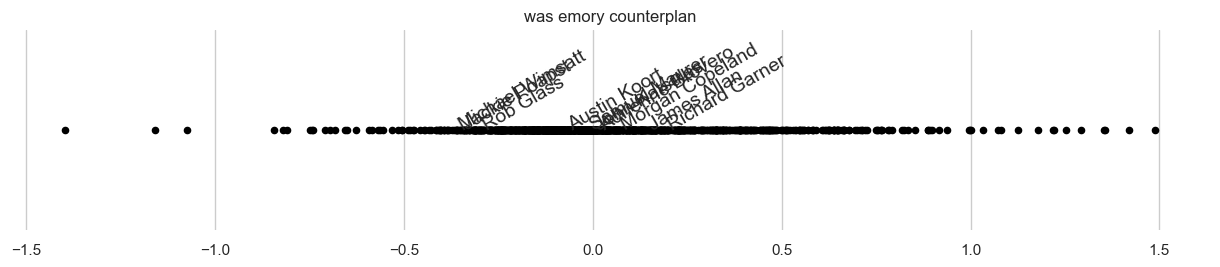

In [85]:
selected_authors = np.array(
    [
        "Rob Glass",
        "James Allan",
        "Michael Wimsatt",
        "Richard Garner",
        "Austin Koort",
        "Adrienne Brovero",
        "Morgan Copeland",
        "John Katsulas",
        "Samuel Maurer",
        "Jackie Poapst"
    ]
)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 2))
ax = plt.axes([0, 0, 1, 1], frameon=False)
ax.set_title('was emory counterplan')
for index in range(authors.shape[0]):
    ax.scatter(authors["ideal_point_14"][index], 0, c="black", s=20)
    if decoder[authors["name"][index]] in selected_authors:
        ax.annotate(
            decoder[authors["name"][index]],
            xy=(authors["ideal_point_14"][index], 0.0),
            xytext=(authors["ideal_point_14"][index], 0),
            rotation=30,
            size=14,
        )
ax.set_yticks([])
plt.show()



In [86]:
authors_c = authors.drop('Unnamed: 0', axis=1)
authors_c.sort_values('ideal_point_5', inplace=True)
authors_c.rename({'name':'Judge ID'}, axis=1, inplace=True)
authors_c.set_index('Judge ID', inplace=True)
authors_c = authors_c.merge(decoder, on='Judge ID')
authors_c.head()

ideal_point_0  ideal_point_1  ideal_point_2  ideal_point_3  \
Judge ID                                                               
8501          -0.138931      -0.087156       0.073199       0.926484   
154323        -0.766413      -0.623287      -0.018540      -0.670325   
11726          0.119110      -0.016458      -0.022205      -0.069481   
7395          -0.153869      -0.139564      -0.029365      -0.105819   
6638           0.621509      -0.080314      -0.019435      -0.264060   

          ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
Judge ID                                                               
8501          -0.028381      -1.924404      -0.009125       0.174318   
154323         0.440507      -1.762038       0.007856      -0.364020   
11726          0.255967      -1.746444      -0.010397      -0.054547   
7395          -0.014188      -1.722550      -0.025367       0.071272   
6638           0.006344      -1.687991      -0.015336      -0.059865   

          ideal_point_8  ideal_point_9  ideal_point_10  ideal_point_11  \
Judge ID                                                                 
8501           0.009379       0.011856       -0.078449        0.162622   
154323        -0.375038      -0.009474       -0.029548       -0.448270   
11726         -0.086703      -0.018479       -0.037596        0.049104   
7395          -0.102736      -0.024144        0.078241       -0.720209   
6638          -0.074903       0.030761        0.037906       -0.273025   

          ideal_point_12  ideal_point_13  ideal_point_14      Judge Name  
Judge ID                                                                  
8501            0.128034        0.026162       -0.127799  Stephen Pipkin  
154323          1.153094        0.012160       -0.053306      Arnav Bawa  
11726           1.074243        0.090090       -1.073962    Nick Charles  
7395            0.330033        0.014985       -0.297342  Blake Hallinan  
6638            0.180668        0.001646        0.258307     Megan Mapes

-1.6969423933333336 1.3543133833333332


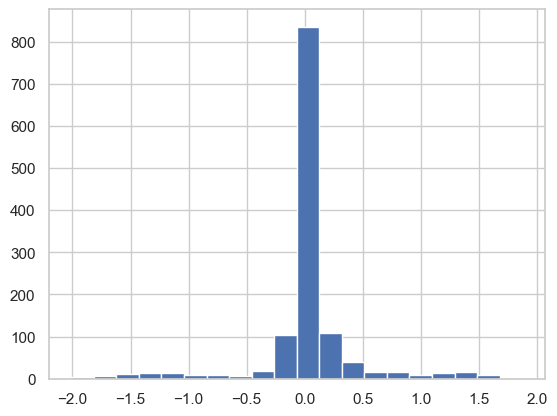

In [87]:
authors_c['ideal_point_4'].hist(bins=20)
print(authors_c.min()[:-1].mean(), authors_c.max()[:-1].mean())



In [88]:

topics = get_topics(neutral_topic_mean, positive_topic_mean, negative_topic_mean, vocabulary)
topics

"['Negative 0: time, way, try, know, speech, often, even, one, look, find'\n 'Neutral  0: good, evidence, time, read, theory, vote, want, need, well, specific'\n 'Positive 0: affirmative, negative, counterplan, vote, case, link, theory, explain, impact, topicality'\n '=========='\n 'Negative 1: vote, theory, please, time, run, read, explain, cp, want, clear'\n 'Neutral  1: aff, good, impact, policy, need, read, theory, win, explain, link'\n 'Positive 1: aff, dont, affs, win, good, im, args, policy, need, link'\n '=========='\n 'Negative 2: one, people, year, know, important, much, time, game, point, understand'\n 'Neutral  2: one, evidence, good, read, way, need, claim, win, vote, student'\n 'Positive 2: good, critical, win, vote, anti, topical, answer, need, want, black'\n '=========='\n 'Negative 3: impact, aff, framework, need, link, evaluate, win, explain, vote, good'\n 'Neutral  3: aff, impact, good, read, neg, da, card, vote, topic, cp'\n 'Positive 3: da, cp, topic, card, high_sc

In [89]:
K = neutral_topic_mean.shape[0]
neutral_topic_mean.shape

(15, 15748)

In [90]:
from wordcloud import WordCloud #type: ignore

In [91]:
authors_c.drop("Judge Name", axis=1).abs().mean().max()

0.2289656689085087

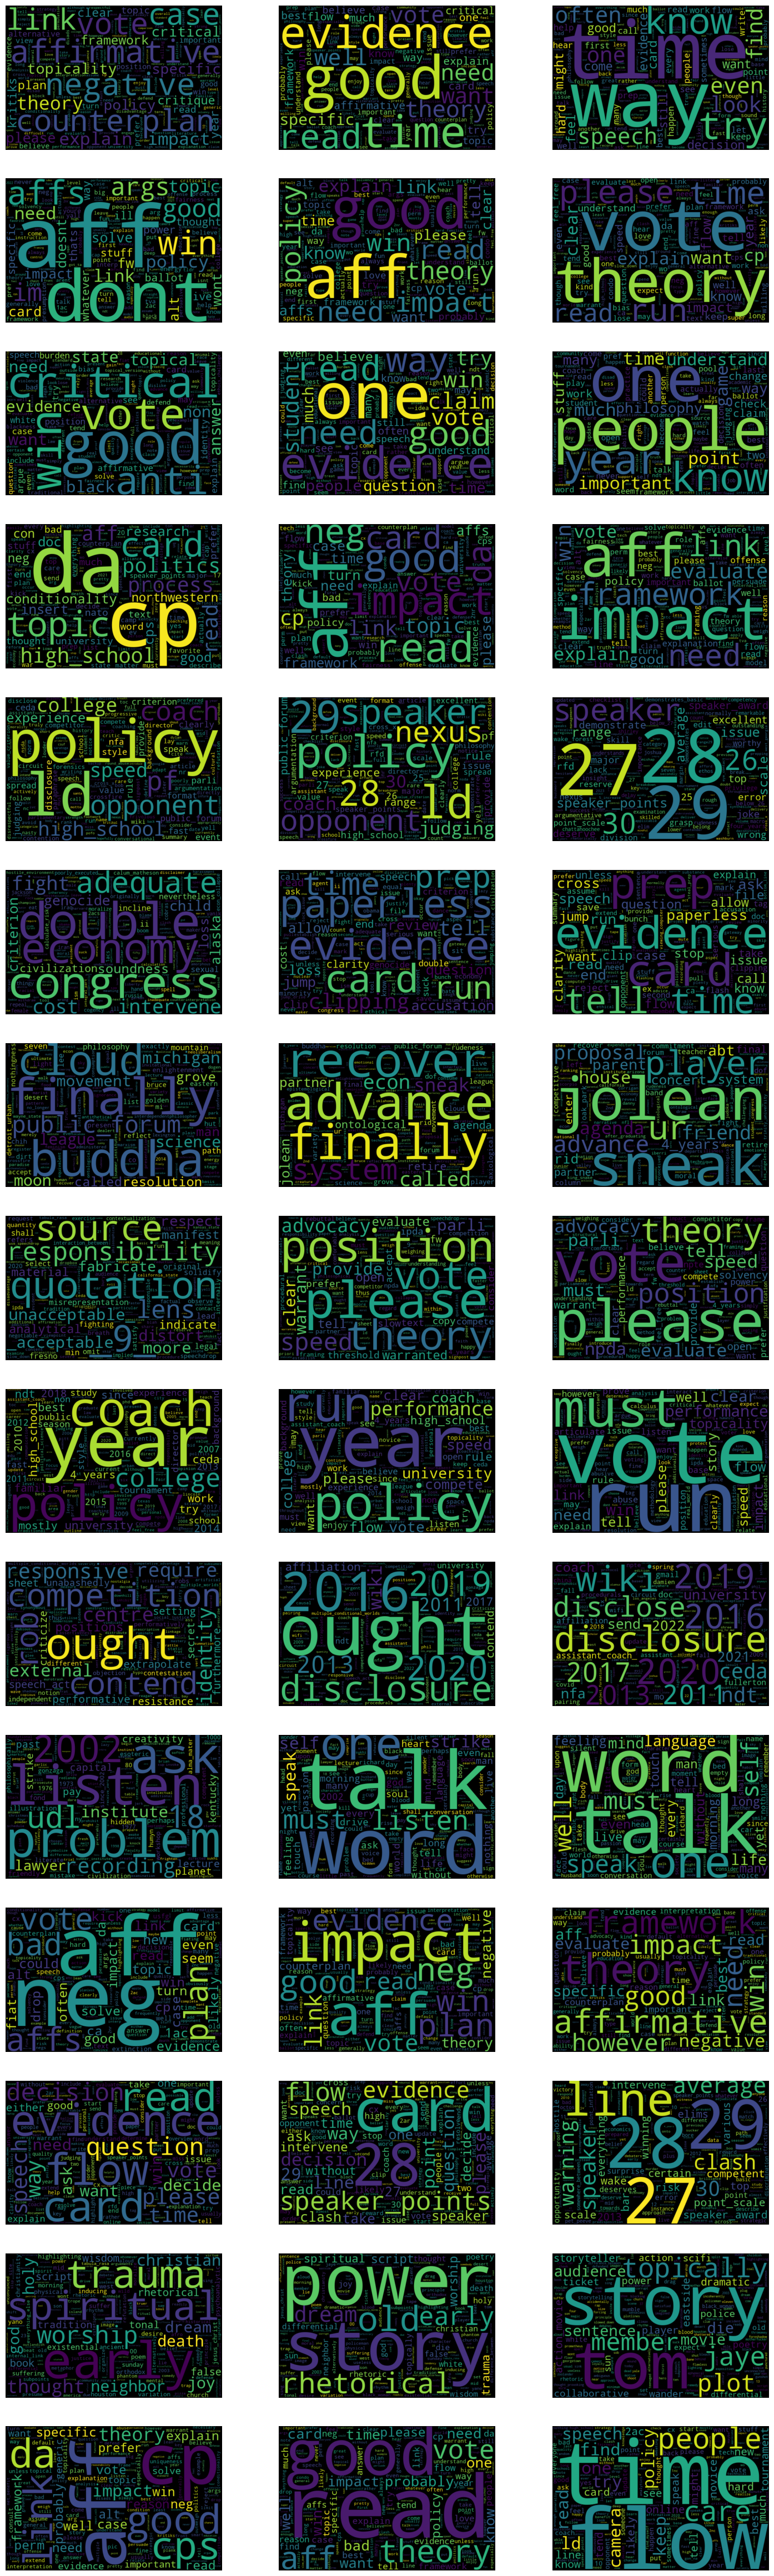

In [92]:
means_list = [negative_topic_mean, neutral_topic_mean, positive_topic_mean]
px = 1/plt.rcParams['figure.dpi']
fig, axes = plt.subplots(K,3, figsize=(600*3*px,K*400*px))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        word_freq = dict(zip(vocabulary, means_list[j][i,:]))
        wordcloud = WordCloud(width=600, height=400).generate_from_frequencies(word_freq)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        


In [48]:
authors_c.head()

ideal_point_0  ideal_point_1  ideal_point_2  ideal_point_3  \
Judge ID                                                               
23780         -0.116151       0.007651      -0.011368      -0.043465   
14370         -0.145082       0.001921       0.004035       0.096933   
14531         -0.100426       0.008859       0.013166      -0.018020   
37459          0.022522      -0.005200       0.030222       0.025980   
7933          -0.004503       0.013611      -0.014987      -0.027463   

          ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
Judge ID                                                               
23780         -0.985458      -0.001606       0.667010      -0.028922   
14370         -0.925864      -0.000179      -0.404481      -0.104735   
14531         -0.905907       0.054211       0.026825       0.008539   
37459         -0.860748      -0.034100      -0.304360       0.130019   
7933          -0.848896       0.000705      -0.213022      -0.027456   

          ideal_point_8  ideal_point_9  ...  ideal_point_21  ideal_point_22  \
Judge ID                                ...                                   
23780         -0.015065       0.168074  ...        0.035034       -0.002429   
14370         -0.020264       0.061315  ...        0.004731       -0.015926   
14531         -0.004760      -0.061835  ...       -0.009779       -0.003808   
37459         -0.027630       0.176267  ...       -0.001676       -0.005239   
7933           0.024020       0.283971  ...        0.027433        0.026750   

          ideal_point_23  ideal_point_24  ideal_point_25  ideal_point_26  \
Judge ID                                                                   
23780           1.868882       -0.058395       -0.436849        0.010565   
14370          -0.025946        0.029141       -0.012082       -0.005516   
14531          -0.093426        0.034075       -0.229691        0.042108   
37459           1.529982        0.033082        0.142701       -0.020060   
7933           -0.063795        0.015740        0.025700       -0.029375   

          ideal_point_27  ideal_point_28  ideal_point_29       Judge Name  
Judge ID                                                                   
23780           0.170675        0.040096       -0.012536  Vladimir Pavlov  
14370           0.028212       -0.026394       -0.020401        Ben Allen  
14531           0.030802       -0.042450       -0.007877   Carlos Astacio  
37459          -0.016573        0.173115       -0.032418   Isaiah Salgado  
7933            0.283197       -0.187952        0.030021    Zeke Mihelcic  

[5 rows x 31 columns]